# Khám phá các mối quan hệ giữa các đặc trưng trong tập dữ liệu

### Mối quan hệ phi tuyến giữa các yếu tố thời tiết với nhau và mối quan hệ giữa các thành phần không khí với nhau

#### Import các thư viện cần thiết

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.cm as cm

#### Chuẩn bị dữ liệu

In [6]:
weather_feature = ['Temprature (Kelvin)', 'Feels like (Kelvin)',
       'Pressure (mb)', 'Humidity (%)', 'Temperature Amplitude',
       'Wind speed (m/s)', 'Wind degree', 'Wind gust (m/s)', 'Clouds all (%)',
       'Rain 1h (mm)']
air_feature = ['aqi','co','no2','o3','so2','pm2_5','pm10'] # NH3 và NO không đóng góp trong thang đo ô nhiễm của dataset nên không thêm vào
weather_data = data[weather_feature].copy()
air_data = data[air_feature].copy()

In [7]:
weather_data.head()

Temprature (Kelvin)  Feels like (Kelvin)  Pressure (mb)  Humidity (%)  \
0               301.16               306.75         1011.0          89.0   
1               301.16               306.75         1011.0          89.0   
2               301.16               306.75         1010.0          89.0   
3               300.16               304.35         1009.0          94.0   
4               299.16               299.16         1009.0          94.0   

   Temperature Amplitude  Wind speed (m/s)  Wind degree  Wind gust (m/s)  \
0                    0.0              0.51          0.0              0.0   
1                    0.0              0.51        300.0              0.0   
2                    0.0              0.51          0.0              0.0   
3                    0.0              0.51        330.0              0.0   
4                    0.0              0.51        290.0              0.0   

   Clouds all (%)  Rain 1h (mm)  
0            40.0           0.0  
1            40.0           0.0  
2            40.0           0.0  
3            40.0           0.0  
4            40.0           0.0

In [8]:
air_data.head()

aqi       co    no2   o3    so2   pm2_5    pm10
0  5.0   921.25  42.50  0.0  56.74  246.02  294.09
1  5.0  4699.71  34.62  0.0  42.44  199.75  233.37
2  5.0  3791.81  26.73  0.0  29.80  157.48  177.82
3  5.0  3017.43  20.91  0.0  22.41  121.27  132.87
4  5.0  2456.67  17.82  0.0  19.55   96.76  104.39

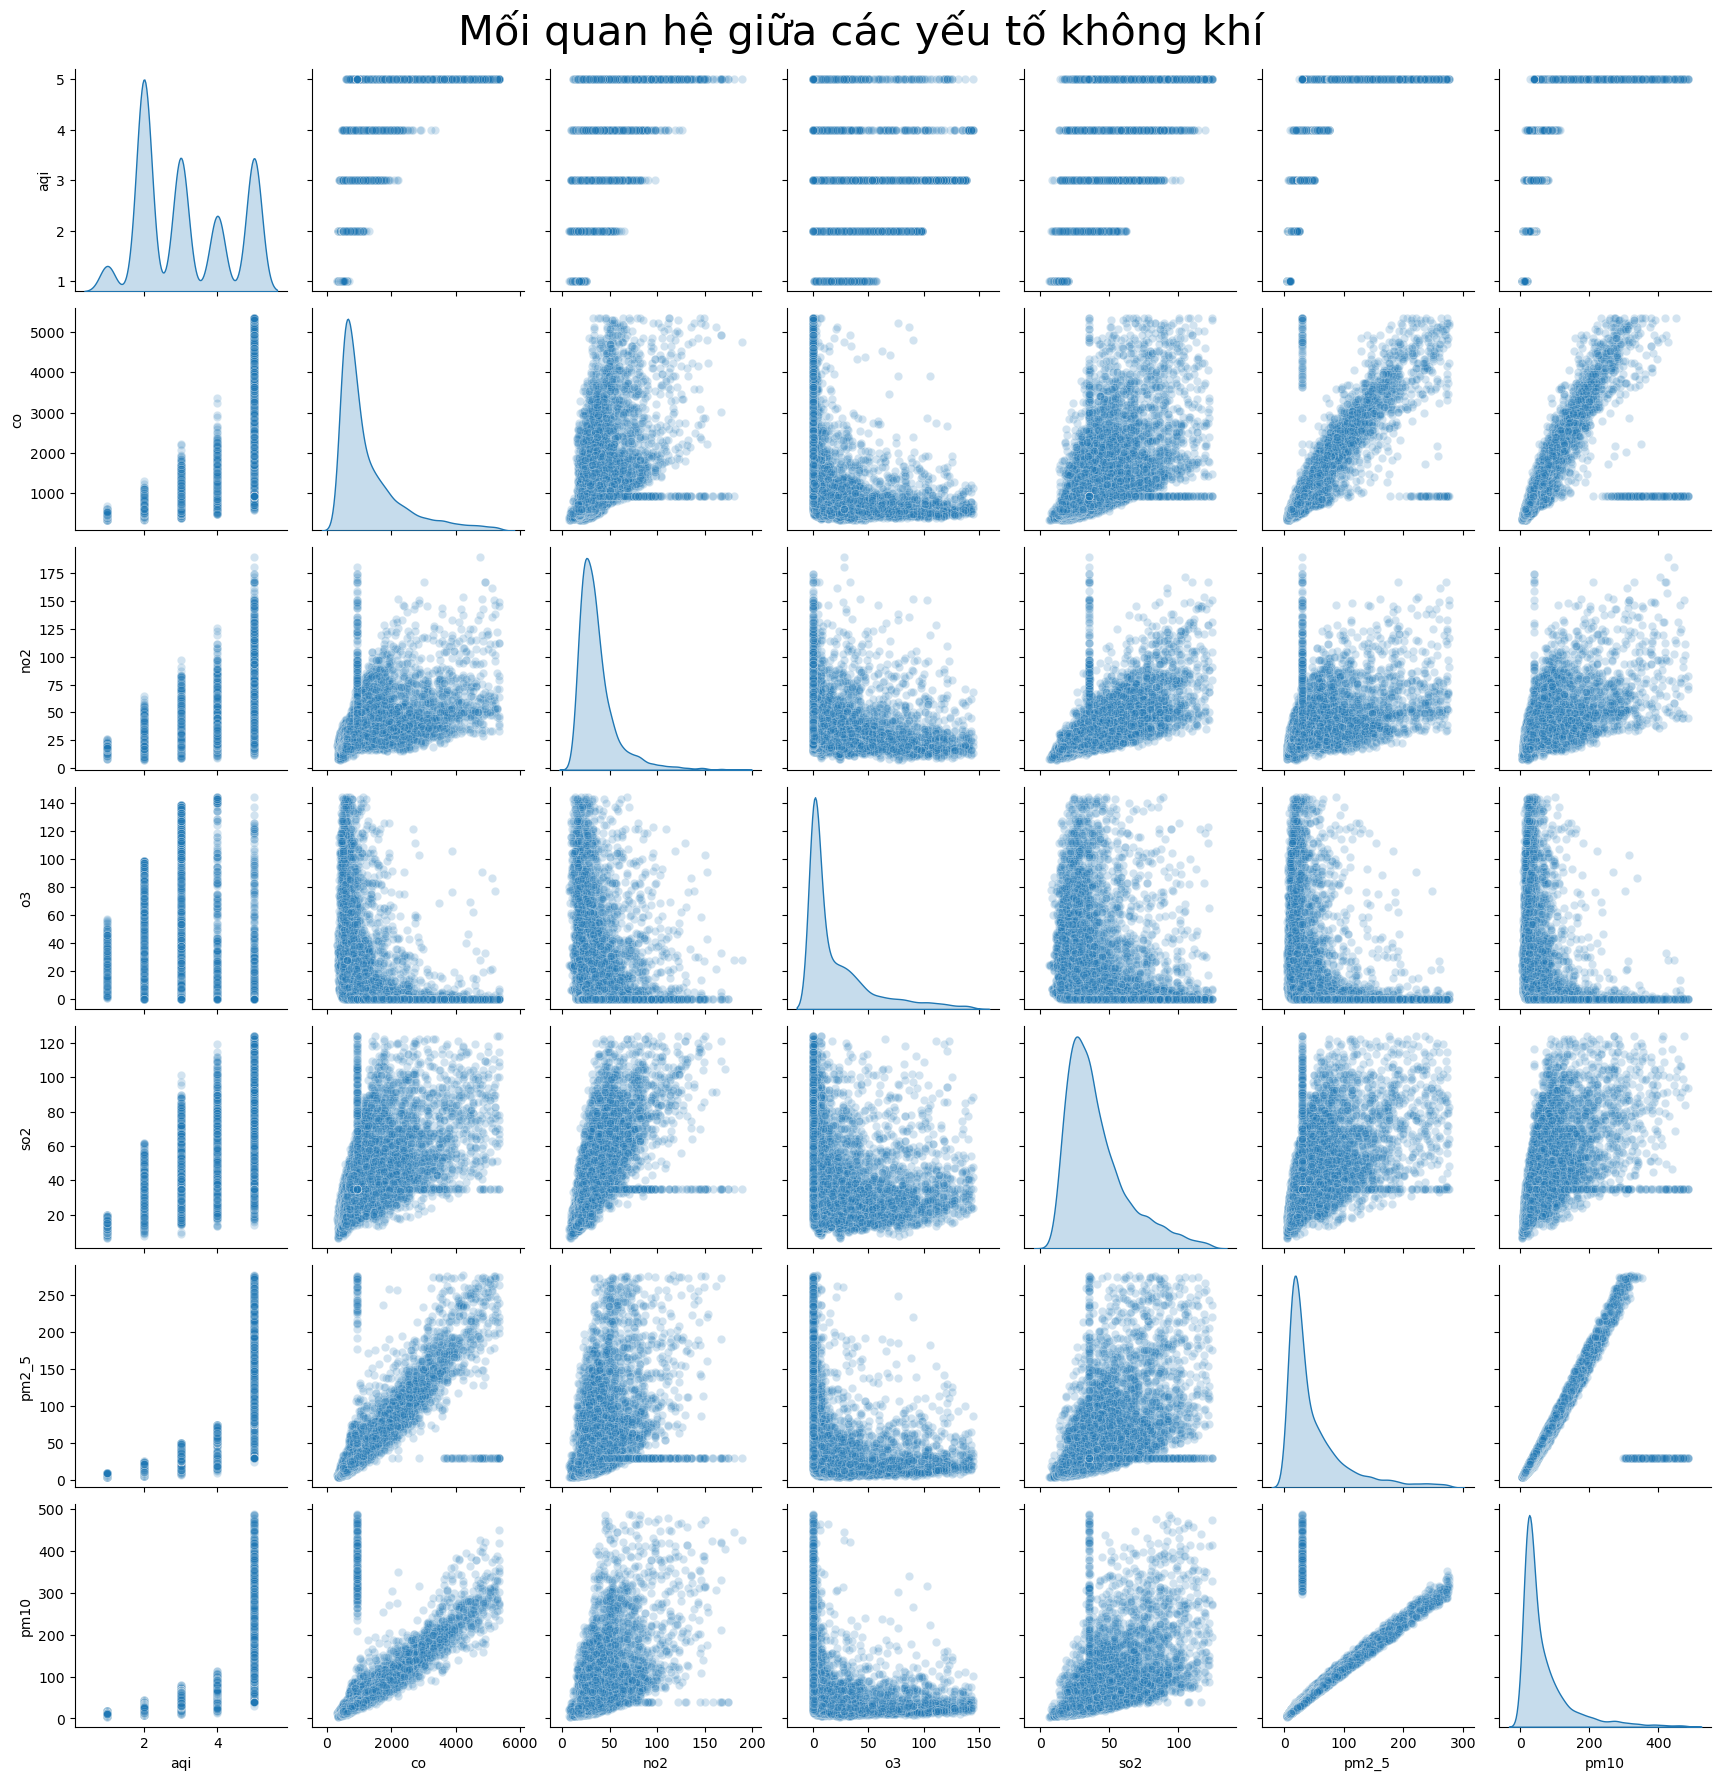

In [5]:
sns.pairplot(air_data, diag_kind='kde', plot_kws={'alpha': 0.2})
plt.suptitle('Mối quan hệ giữa các yếu tố không khí', y=1.02, fontsize=30)
plt.show()

- PM10 và PM2.5 có quan hệ tuyến tính tương đối rõ ràng do có cùng tính chất. 
- PM10 và PM2.5 có nồng độ rất cao khi mức AQI đạt cao nhất, đây có thể là nguyên nhân gây ra ô nhiễm. CO cũng có nồng độ cao khi mức AQI đạt cao nhất.
- $O_{3}$ có tương quan nghịch khi so sánh với các thành phần không khí còn lại.
- Các thành phần không khí còn lại có quan hệ phi tuyến với phân bố dữ liệu không đều

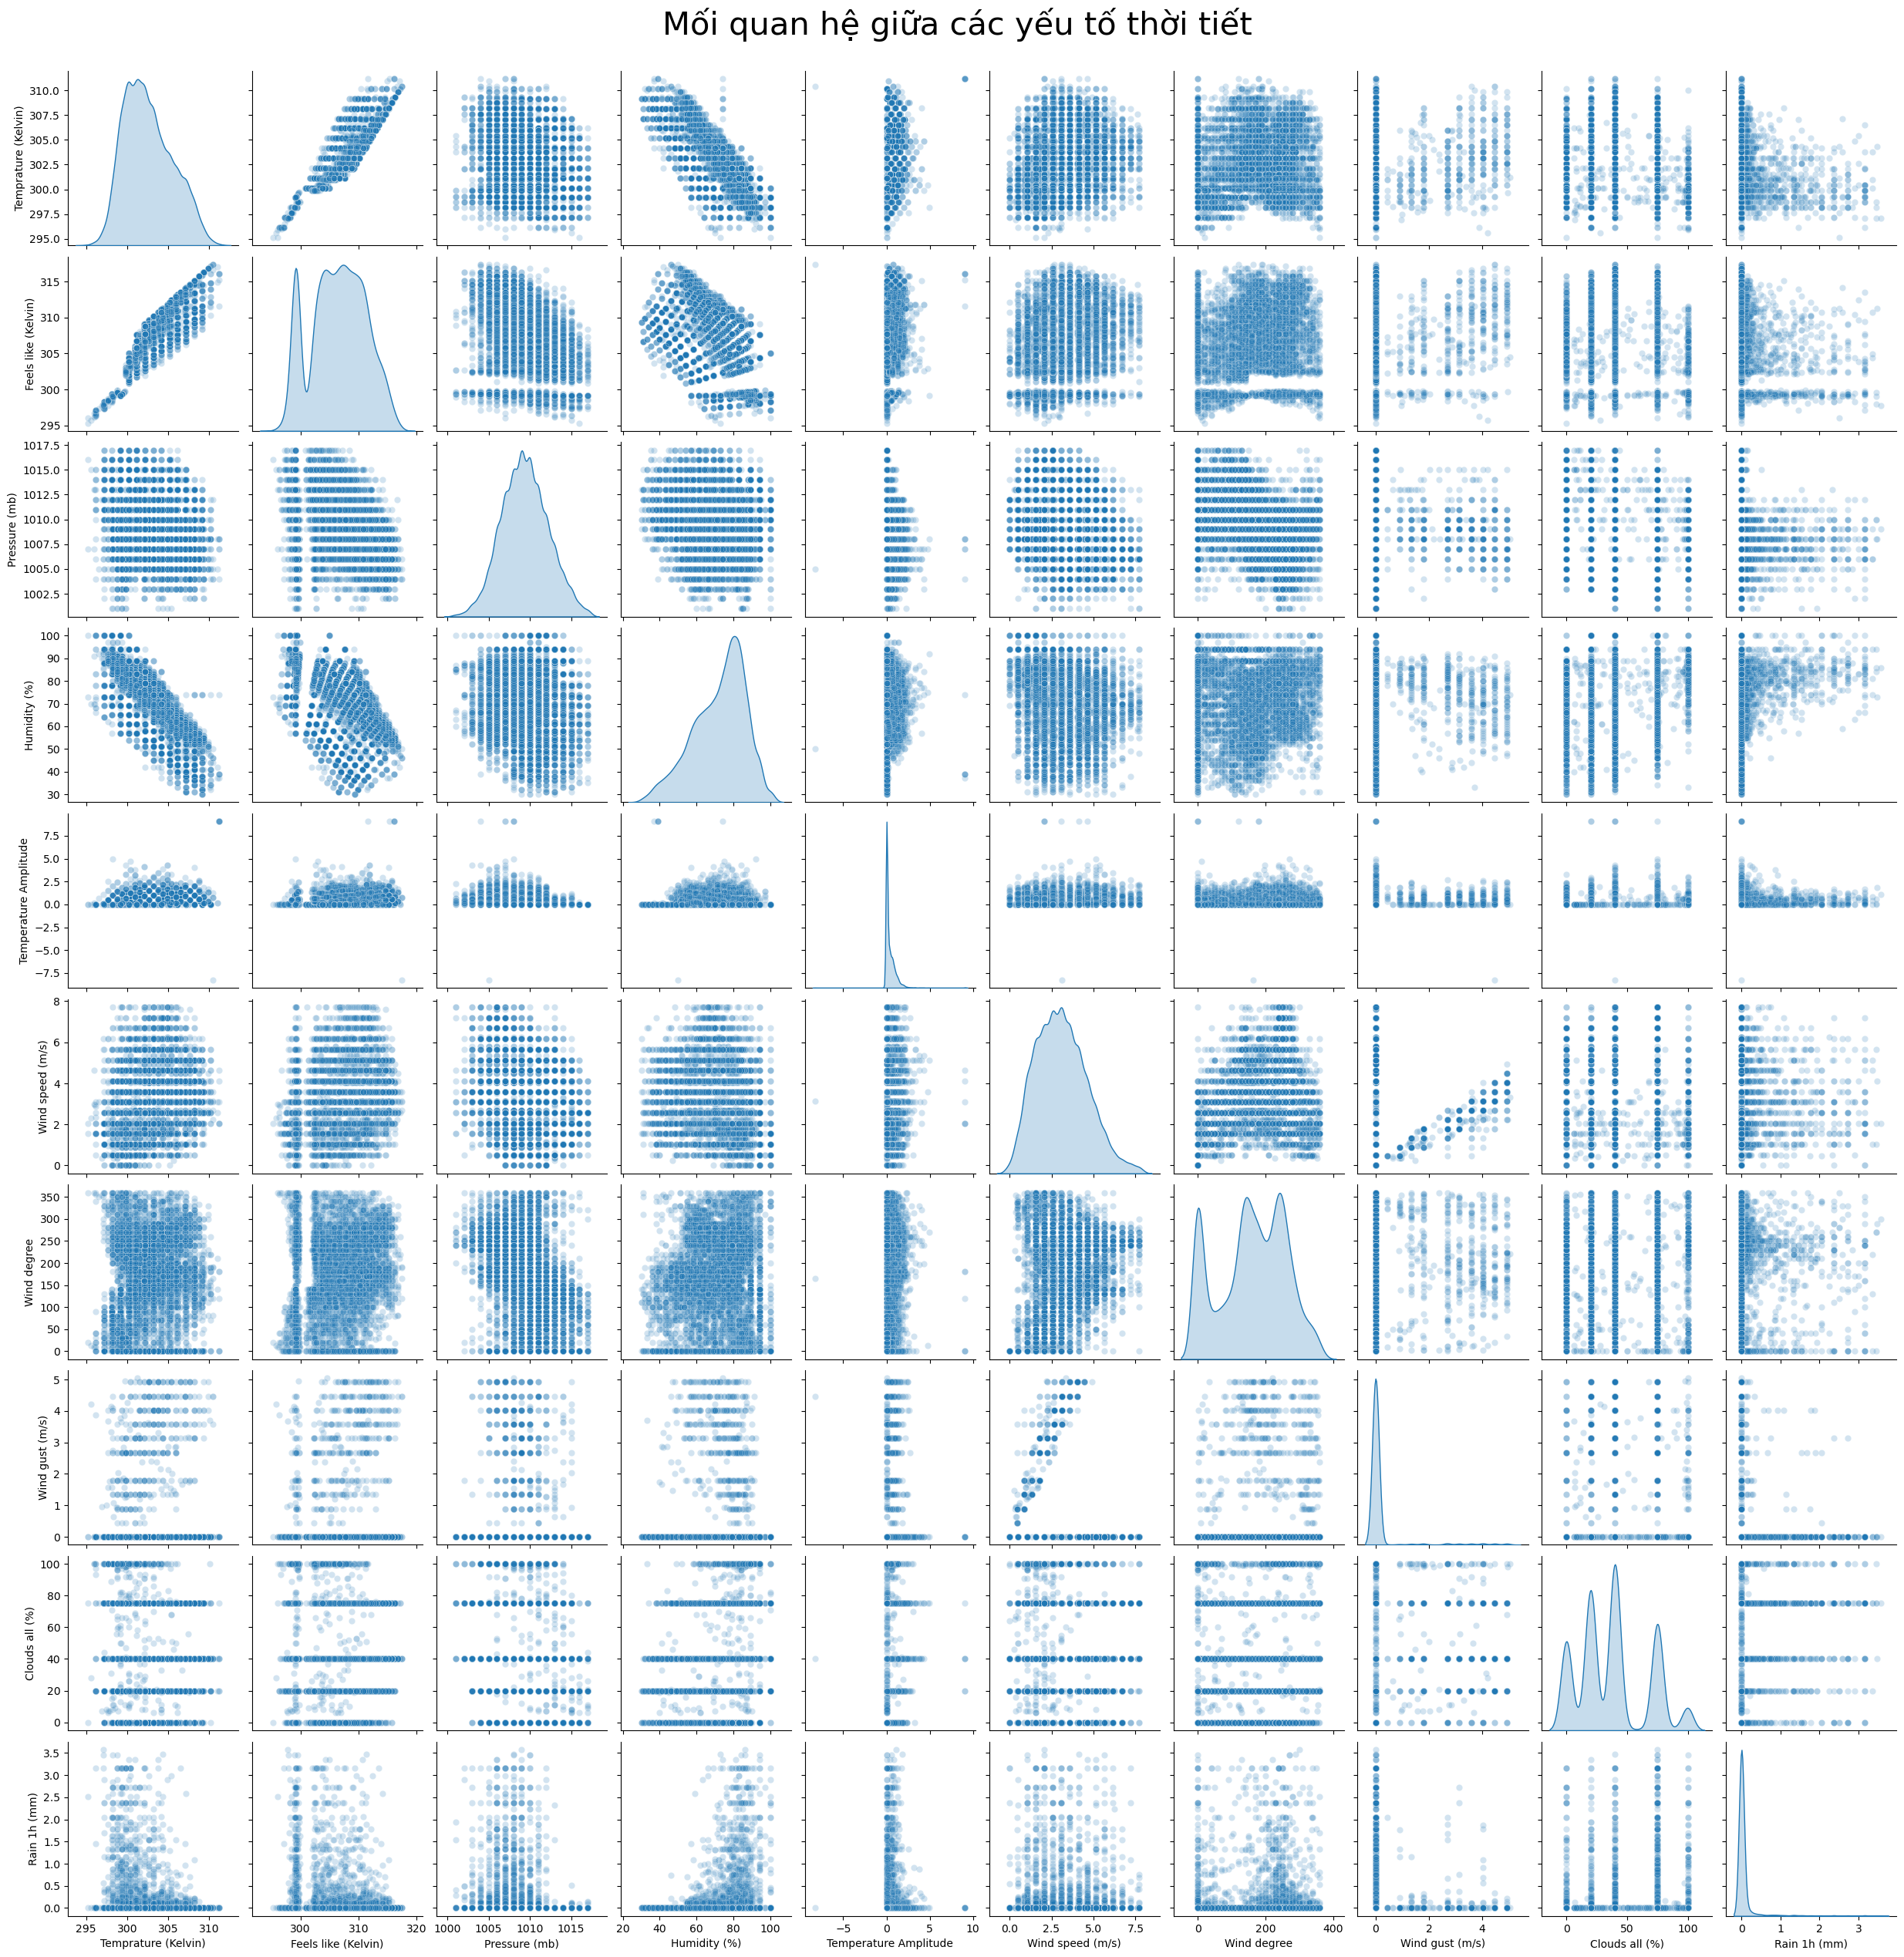

In [6]:
sns.pairplot(weather_data, diag_kind='kde', plot_kws={'alpha': 0.2})
plt.suptitle('Mối quan hệ giữa các yếu tố thời tiết', y=1.02, fontsize=30)
plt.show()

#### Nhận xét:
Mối quan hệ giữa các yếu tố thời tiết trong biểu đồ cho thấy sự ảnh hưởng lẫn nhau nhất định. Tuy nhiên, không xuất hiện mối quan hệ tuyến tính rõ ràng nào giữa các yếu tố. Điều này gợi ý rằng có khả năng tồn tại các mối quan hệ phi tuyến phức tạp giữa chúng do đó phải sử dụng các mô hình học máy phù hợp để giải quyết tốt được những mối quan hệ này

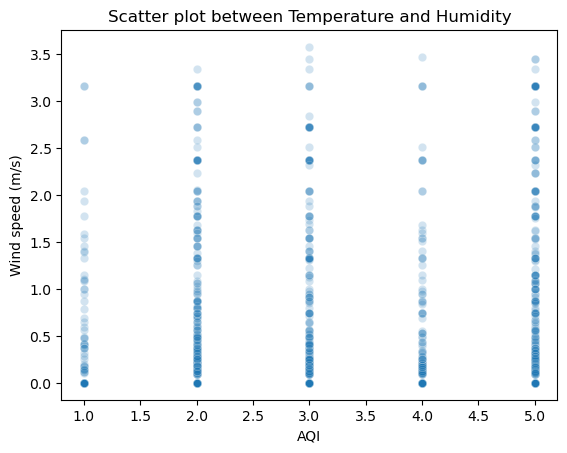

In [14]:
# Ví dụ: Vẽ biểu đồ scatter giữa cột 'Temperature' và 'Humidity'
sns.scatterplot(data=data, x='aqi', y='Rain 1h', alpha=0.2)

# Thêm nhãn và tiêu đề
plt.xlabel('AQI')
plt.ylabel('Wind speed (m/s)')
plt.title('Scatter plot between Temperature and Humidity')

# Hiển thị biểu đồ
plt.show()


### Mức độ quan trọng của từng đặc trưng thời tiết đối với mức AQI và các thành phần không khí

#### Sử dụng Random Forest Regressor xác định độ quan trọng của từng đặc trưng thời tiết với mức AQI và các thành phần không khí

In [35]:
# Chia tập dữ liệu
X_train, X_test, y_train, y_test = train_test_split(weather_data, air_data, test_size=0.2, random_state=42)

# Train mô hình Random Forest cho từng đầu ra
models = []
feature_importances = []
for i in range(air_data.shape[1]):
    model = RandomForestRegressor(random_state=42, n_estimators=100)
    model.fit(X_train, y_train.iloc[:, i])
    models.append(model)
    feature_importances.append(model.feature_importances_)


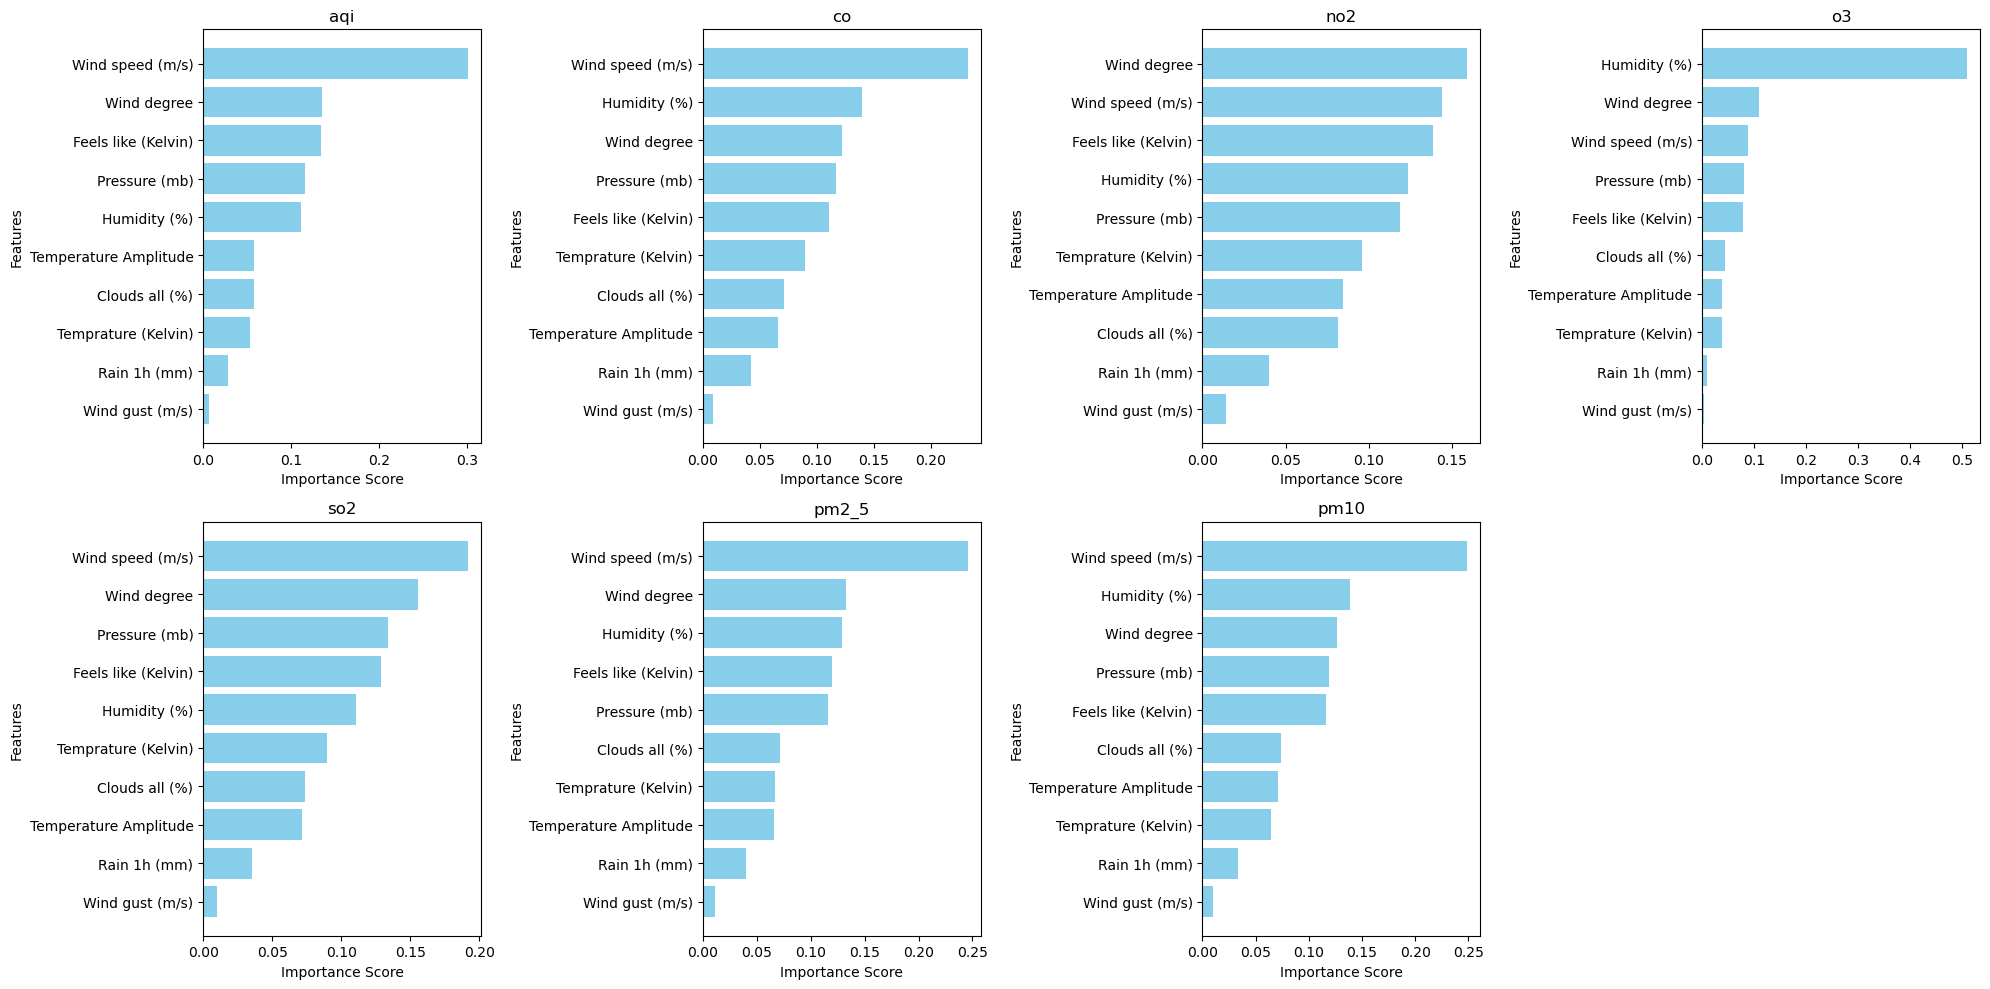

In [34]:
# Tổng hợp độ quan trọng
importance_df = pd.DataFrame(feature_importances, columns=weather_data.columns, index=air_data.columns).T

# Đặt số hàng và số cột
nrows = 2
ncols = 4

# Tạo lưới biểu đồ
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 10), sharey=False)

# Flatten trục để dễ duyệt
axes = axes.flatten()

# Vẽ biểu đồ cho từng đầu ra
for i, ax in enumerate(axes[:air_data.shape[1]]):  # Chỉ xử lý số lượng biểu đồ cần thiết
    # Sắp xếp đặc trưng theo độ quan trọng
    sorted_importance = importance_df.iloc[:, i].sort_values(ascending=False)
    
    # Vẽ biểu đồ
    ax.barh(sorted_importance.index, sorted_importance.values, color='skyblue')
    ax.set_title(f'{air_feature[i]}')
    ax.set_xlabel('Importance Score')
    ax.set_ylabel('Features')  # Thêm nhãn trục y cho từng biểu đồ
    ax.invert_yaxis()  # Đảo ngược thứ tự trục y

# Ẩn trục dư nếu không đủ biểu đồ
for ax in axes[air_data.shape[1]:]:
    ax.axis('off')

plt.tight_layout()
plt.show()


- Nhận xét chung: đa phần nồng độ của các thành phần không khí và mức độ ô nhiễm đều chịu ảnh hưởng lớn bởi các yếu tố liên quan đến gió (Wind speed, Wind degree) và độ ẩm (Humidity, Feels like - được đo bằng nhiệt độ và độ ẩm không khí, khi nhiệt độ và độ ẩm cao sẽ thấy nóng hơn, khi nhiệt độ thấp và độ ẩm cao sẽ thấy lạnh hơn). Các yếu tố như gió giật (Wind gust) và mưa (Rain 1h) không đóng góp quá nhiều vào độ quan trọng, một phần do các hiện tượng gió giật không quá phổ biến đối với thời tiết ở TP. Hồ Chí Minh cũng như các loại khí độc không bị loại bỏ hoàn toàn bởi các cơn mưa vừa và nhỏ.
- Nhận xét chi tiết:
    - Ozone tầng mặt đất $(O_{3})$ chịu ảnh hưởng nhiều nhất bởi độ ẩm.
    - Các loại bụi mịn như PM2.5 và PM10 chịu ảnh hưởng của gió nhiều nhất so với các thành phần còn lại. Các hạt này có khả năng hút nước và trở nên nặng hơn, tuy nhiên PM10 bị ảnh hưởng bởi độ ẩm nhiều hơn PM2.5 một phần do kích thước của chúng lớn hơn nên khi hút ẩm khả năng lơ lửng của chúng trong không khí sẽ giảm mạnh hơn.
    - Đối với $SO_{2}$, $NO_{2}$, đây là các sản phẩm được tạo ra bởi quá trình sản phẩm tạo ra bởi quá trình sản xuất công nghiệp, chúng có đặc điểm chung là đều nặng hơn không khí và có thể kết hợp với $O_{2}$, $H_{2}O$ trong không khí để tạo nên axit khi gặp phải những điều kiện xúc tác thích hợp. Do tính chất nặng hơn không khí nên chúng sẽ ít bị ảnh hưởng bởi gió hơn khi so với PM2.5 và PM10.
    - CO là chất đặc biệt độc hại có khả năng gây ra ngộ độc vô cùng nghiêm trọng khi tiếp xúc với nồng độ và thời gian đủ lâu. CO nhẹ hơn không khí do đó chịu ảnh hưởng của gió nhiều hơn so với $SO_{2}$ và $NO_{2}$.
- Tổng kết: Đa phần các yếu tố thời tiết có ảnh hưởng trực tiếp và mạnh mẽ đến chất lượng không khí cũng như thành phần không khí. Dựa trên những dữ kiện này ta có thể thực hiện mô hình hóa dự đoán các chỉ số không khí dựa trên dữ liệu thời tiết. Tuy nhiên các thành phần không khí còn chịu ảnh hưởng của nhiều yếu tố khác ngoài thời tiết, đặc biệt là con người

#### Ảnh hưởng của tốc độ gió đến các thành phần không khí

<Figure size 800x600 with 0 Axes>

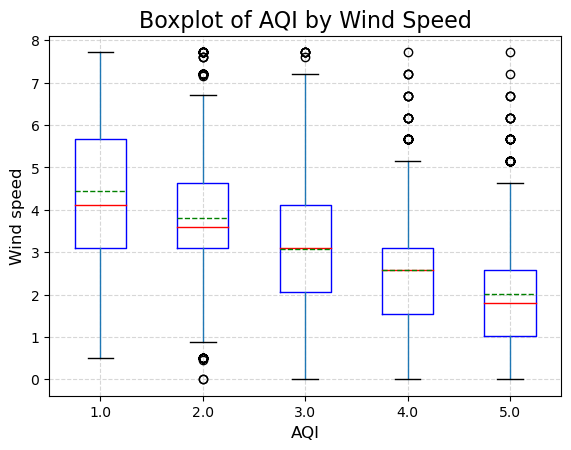

In [55]:
# Vẽ boxplot
plt.figure(figsize=(8, 6))
data.boxplot(column='Wind speed (m/s)', by='aqi', grid=False, showmeans=True, meanline=True, 
            boxprops=dict(color="blue"), medianprops=dict(color="red"), 
            meanprops=dict(color="green"))
plt.title("Boxplot of AQI by Wind Speed", fontsize=16)
plt.suptitle("")  # Loại bỏ tiêu đề mặc định từ pandas boxplot
plt.xlabel("AQI", fontsize=12)
plt.ylabel("Wind speed", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


Chất lượng không khí có xu hướng tăng khi tốc độ gió tăng. Điều này có thể là do khi có gió, các chất ô nhiễm sẽ theo gió đi đến những khu vực khác, vô tình làm nồng độ các chất ô nhiễm tại khu vực giảm

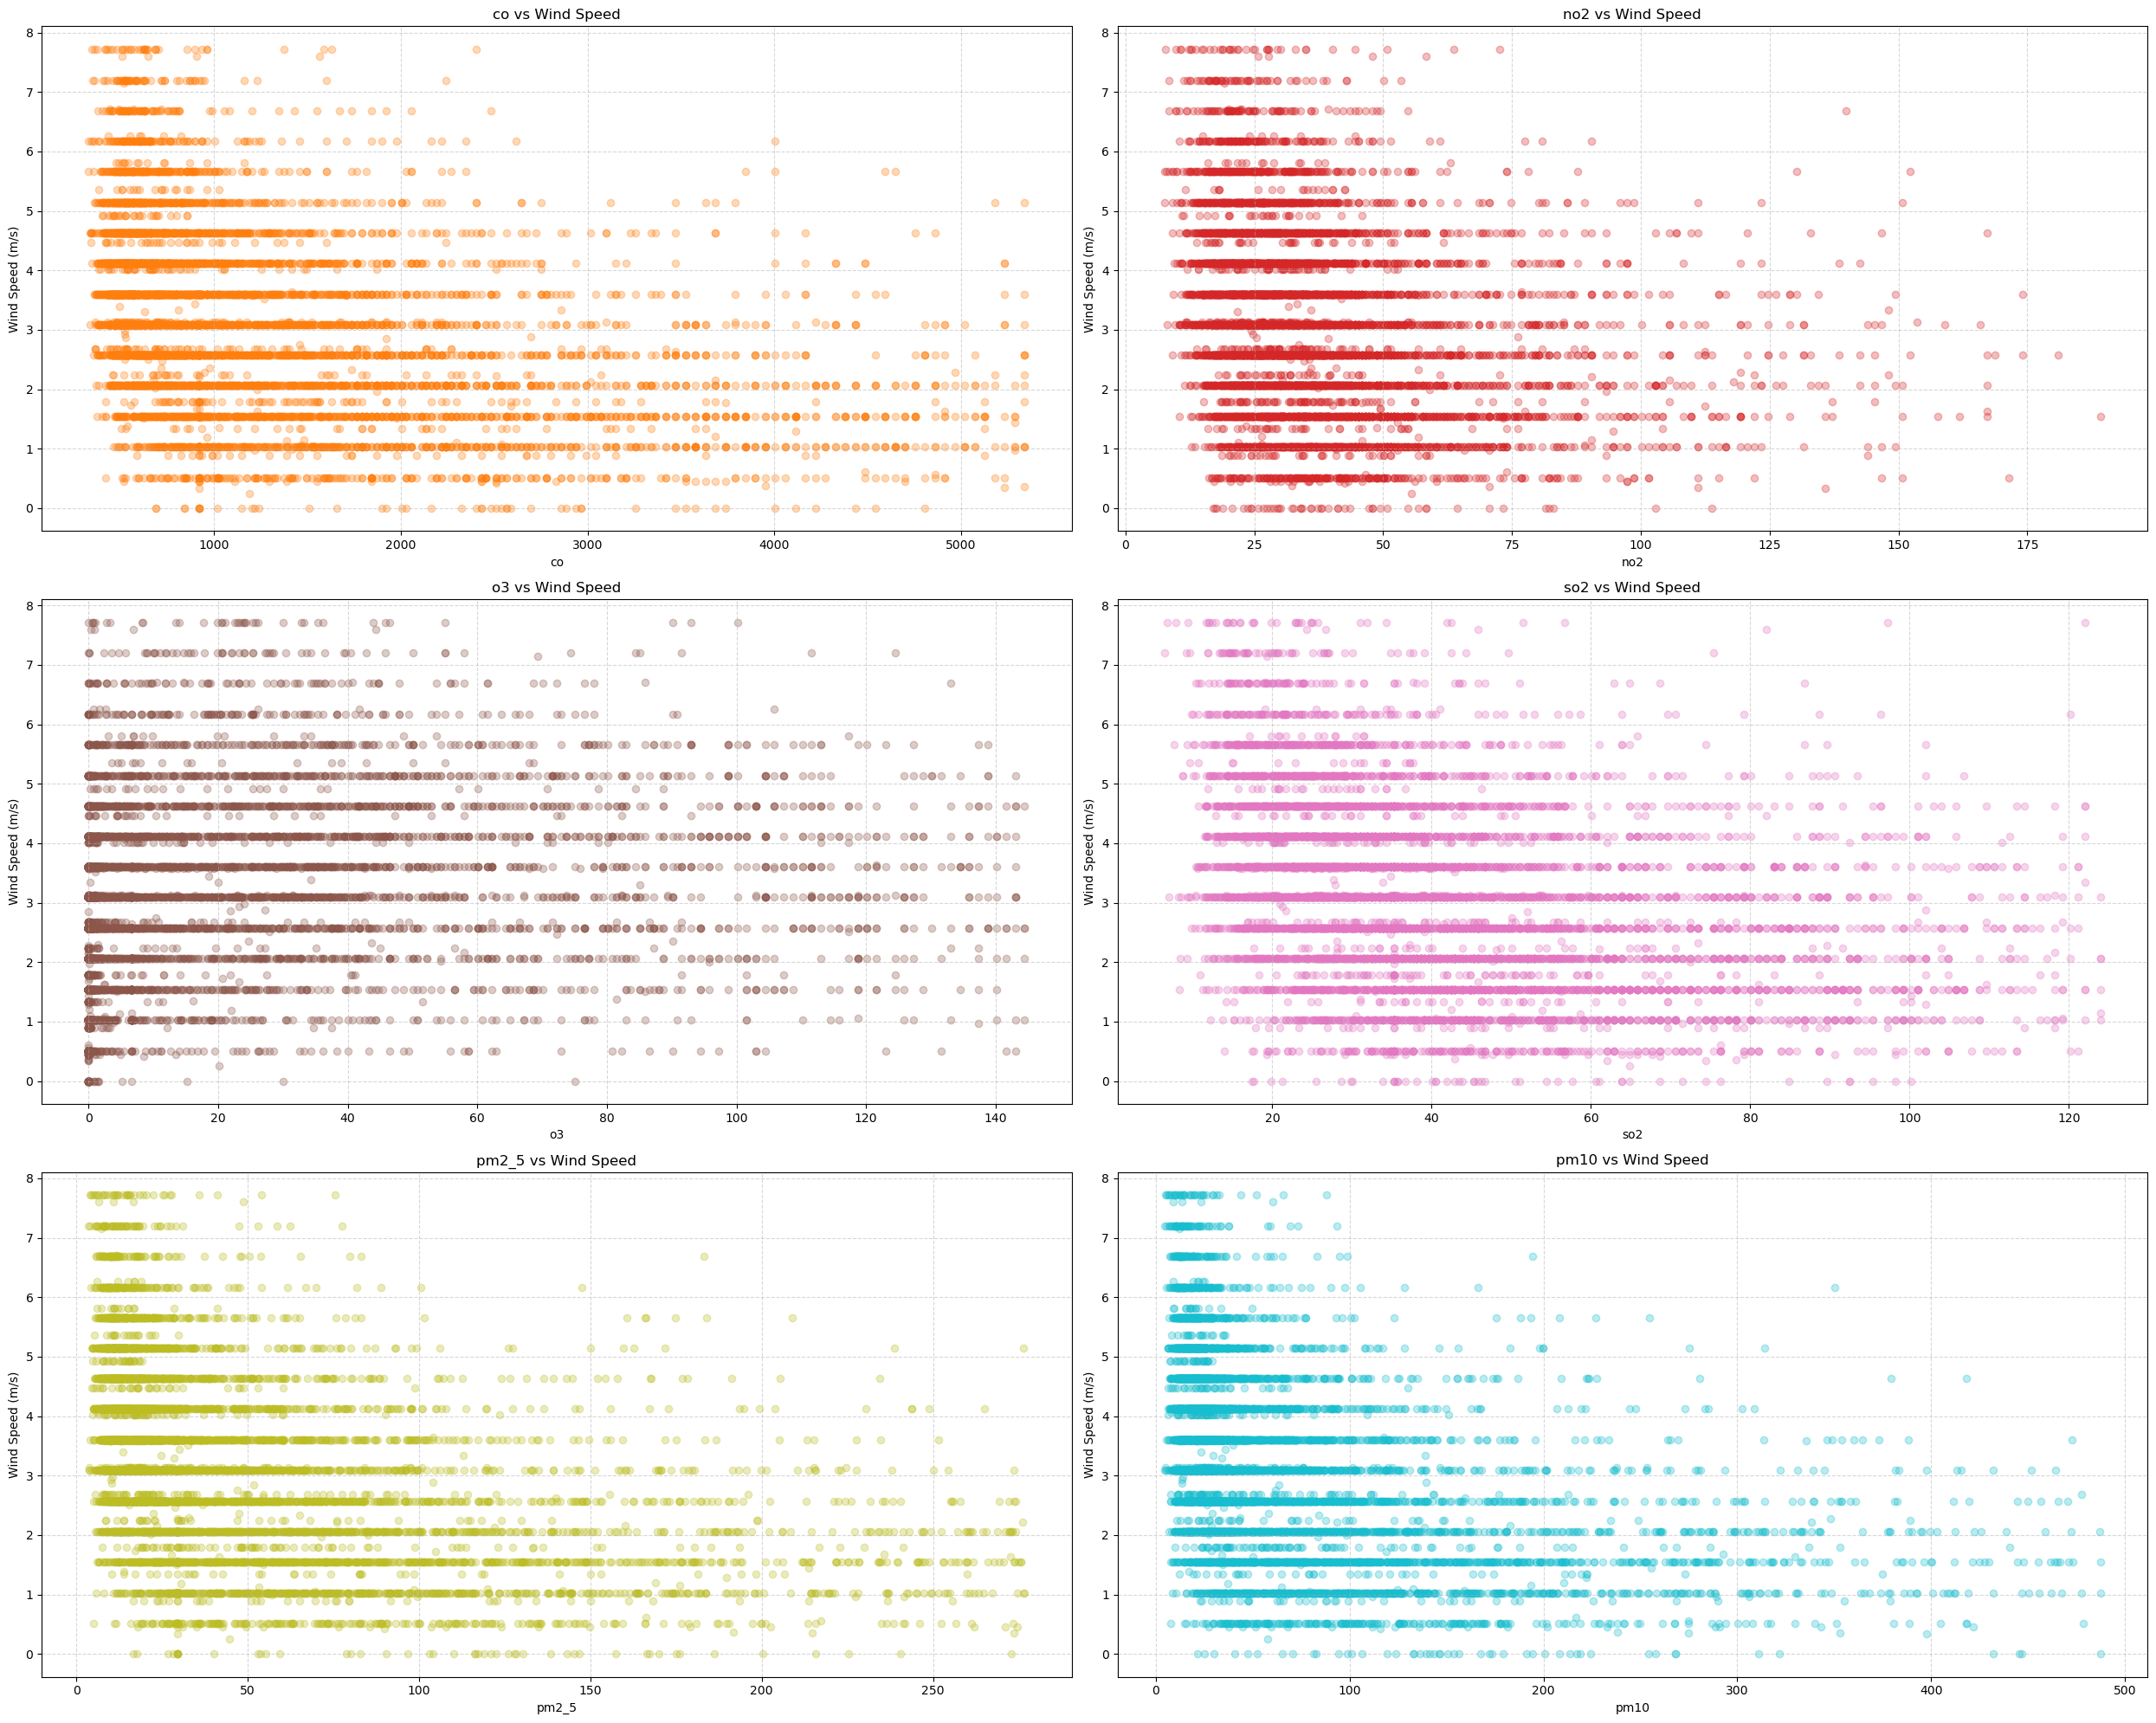

In [51]:
# Tạo danh sách màu sắc từ colormap
colors = cm.get_cmap('tab10', len(air_feature))  # Lấy colormap có 10 màu

# Xác định số hàng và cột cho grid layout
rows = 3
cols = 2
total_plots = len(air_feature)

# Tạo figure và các subplot
fig, axes = plt.subplots(rows, cols, figsize=(25, 20))
axes = axes.flatten()  # Chuyển mảng subplot thành 1D để dễ quản lý

# Vẽ từng scatter plot
for i in range(1, total_plots):
    axes[i - 1].scatter(data[air_feature[i]], data['Wind speed (m/s)'], alpha=0.3, c=[colors(i)])
    axes[i - 1].set_title(f"{air_feature[i]} vs Wind Speed", fontsize=12)
    axes[i - 1].set_xlabel(air_feature[i], fontsize=10)
    axes[i - 1].set_ylabel("Wind Speed (m/s)", fontsize=10)
    axes[i - 1].grid(True, linestyle='--', alpha=0.5)

# Tắt các subplot thừa
for i in range(total_plots, len(axes)):
    axes[i].axis('off')

# Tối ưu khoảng cách giữa các subplot
plt.tight_layout()

# Hiển thị biểu đồ (tùy chọn)
plt.show()


- Nhận xét chung:
    - Đối với PM2.5 và PM10, các hạt bụi mịn này có thể lắng xuống hoặc đứng yên khi thời tiết lặng gió và sẽ theo gió cuốn đi rất nhanh và xa làm thay đổi nồng độ của chúng đối với không khí khu vực
    - Nồng độ CO cao hơn ở các khu vực có tốc độ gió thấp (dưới 2 m/s), khi tốc độ gió tăng lên (trên 4 m/s), nồng độ CO có xu hướng giảm.
    - NO₂ cũng có xu hướng cao hơn ở tốc độ gió thấp, tập trung nhiều dưới 2 m/s, tốc độ gió cao hơn (trên 4 m/s) có vẻ giúp pha loãng NO₂, giảm nồng độ.
    - O₃ có xu hướng ít bị ảnh hưởng bởi tốc độ gió so với CO và NO₂ Tuy nhiên, ở tốc độ gió rất cao (trên 6 m/s), nồng độ O₃ có phần giảm.
    SO₂ (Sulfur Dioxide):
    - Nồng độ SO₂ tập trung ở các khu vực tốc độ gió thấp (dưới 3 m/s), tốc độ gió cao hơn có thể giúp phân tán khí SO₂, giảm nồng độ.
    - PM₂.₅ và PM₁₀ có xu hướng cao hơn ở tốc độ gió thấp, nhưng không giảm mạnh ngay cả khi tốc độ gió tăng, điều này có thể cho thấy bụi mịn và bụi thô khó bị pha loãng chỉ bởi tác động của gió.
- Tổng kết: Tốc độ gió thấp (dưới 2-3 m/s) liên quan đến nồng độ cao của hầu hết các chất ô nhiễm, đặc biệt là CO, NO₂, SO₂, và bụi.
Khi tốc độ gió tăng, không khí trở nên lưu thông tốt hơn, giúp pha loãng các khí ô nhiễm. Tuy nhiên, hiệu quả này dường như không mạnh đối với bụi (PM₂.₅ và PM₁₀).

#### Ảnh hưởng của độ ẩm đến các thành phần không khí

<Figure size 800x600 with 0 Axes>

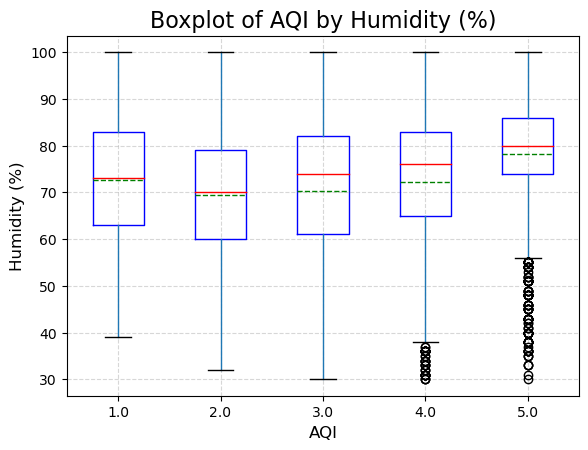

In [56]:
# Vẽ boxplot
plt.figure(figsize=(8, 6))
data.boxplot(column='Humidity (%)', by='aqi', grid=False, showmeans=True, meanline=True, 
            boxprops=dict(color="blue"), medianprops=dict(color="red"), 
            meanprops=dict(color="green"))
plt.title("Boxplot of AQI by Humidity (%)", fontsize=16)
plt.suptitle("")  # Loại bỏ tiêu đề mặc định từ pandas boxplot
plt.xlabel("AQI", fontsize=12)
plt.ylabel("Humidity (%)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Ta thấy, chất lượng không khí có xu hướng giảm khi độ ẩm trong không khí tăng.

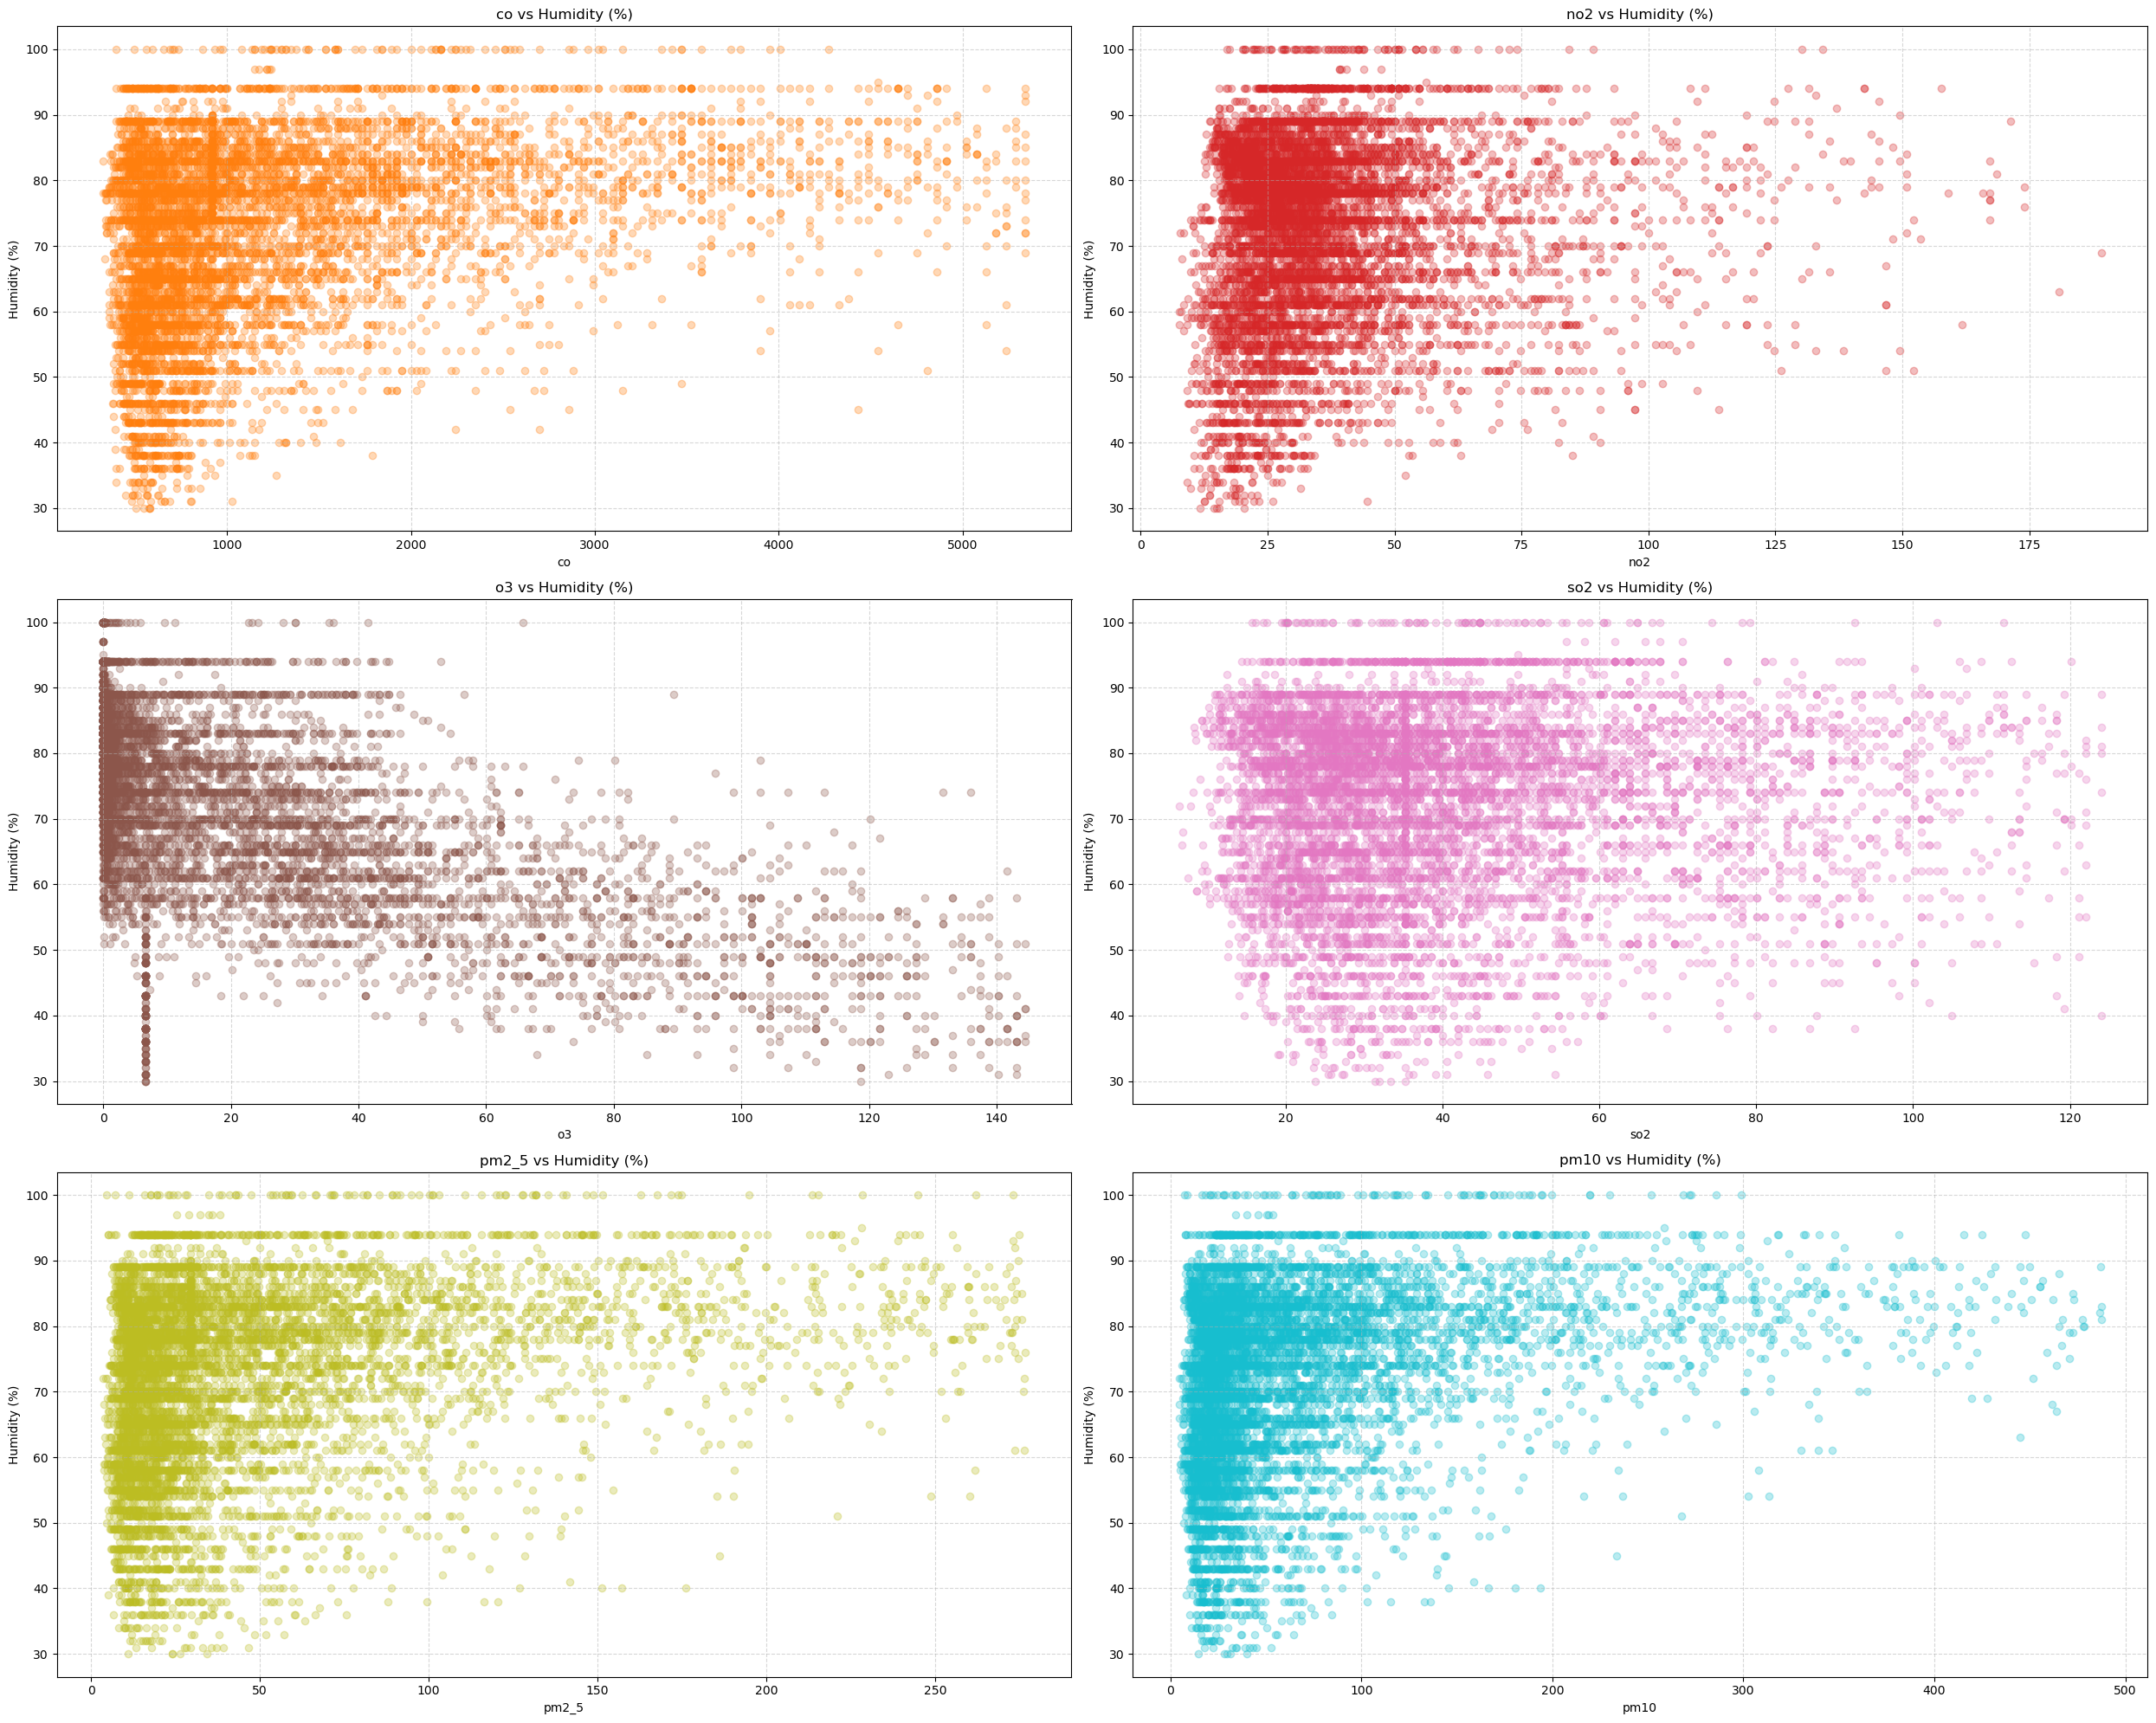

In [53]:
# Tạo danh sách màu sắc từ colormap
colors = cm.get_cmap('tab10', len(air_feature))  # Lấy colormap có 10 màu

# Xác định số hàng và cột cho grid layout
rows = 3
cols = 2
total_plots = len(air_feature)

# Tạo figure và các subplot
fig, axes = plt.subplots(rows, cols, figsize=(25, 20))
axes = axes.flatten()  # Chuyển mảng subplot thành 1D để dễ quản lý

# Vẽ từng scatter plot
for i in range(1, total_plots):
    axes[i - 1].scatter(data[air_feature[i]], data['Humidity (%)'], alpha=0.3, c=[colors(i)])
    axes[i - 1].set_title(f"{air_feature[i]} vs Humidity (%)", fontsize=12)
    axes[i - 1].set_xlabel(air_feature[i], fontsize=10)
    axes[i - 1].set_ylabel("Humidity (%)", fontsize=10)
    axes[i - 1].grid(True, linestyle='--', alpha=0.5)

# Tắt các subplot thừa
for i in range(total_plots, len(axes)):
    axes[i].axis('off')

# Tối ưu khoảng cách giữa các subplot
plt.tight_layout()

# Hiển thị biểu đồ (tùy chọn)
plt.show()

- Độ ẩm cao ảnh hưởng đến sự khuếch tán của chất ô nhiễm:
    - Hiện tượng: Khi độ ẩm tăng cao và không khí gần mức bão hòa, các hạt nước trong không khí tăng lên, làm thay đổi tính chất vật lý của không khí.
    - Kết quả:
        - Ozone tầng mặt đất có xu hướng giảm khi không khí có độ ẩm lớn, khi độ ẩm đạt mức trên 50% $O_{3}$ sẽ giảm mạnh. Lý giải cho điều này: Ozone tầng mặt đất hình thành khi $NO_{x}$ (có thể là NO₂) dưới tác dụng của ánh nắng mặt trời sẽ hình thành O đơn nguyên tử và từ đó kết hợp với O₂ trong không khí để tạo thành Ozone tầng mặt đất. Nhưng độ ẩm cao tạo điều kiện thuận lợi cho các phản ứng hóa học trong không khí, như: SO₂ chuyển hóa thành axit sulfuric (H₂SO₄), NO₂ chuyển hóa thành axit nitric (HNO₃) vô tình làm giảm nồng độ NO₂ từ đó làm giảm tốc độ hình thành của Ozone tầng mặt đất.
        - Tốc độ khuếch tán của các khí ô nhiễm (SO₂, NO₂, CO,...) trong không khí chậm lại do mật độ khí quyển thay đổi. Tuy nhiên ở các mức độ ẩm thấp, phân bố của SO₂ và NO₂ lại trải đều hơn so với CO, có thể do tính chất nhẹ hơn không khí của CO nên khi ở các mức độ ẩm thấp thì CO sẽ có thể khuếch tán và di chuyển lên cao dễ dàng hơn so với SO₂ và NO₂ (vốn đã nặng hơn không khí ở điều kiện bình thường).
        - Các hạt bụi mịn (PM2.5, PM10) có xu hướng hút ẩm, tăng kích thước và khối lượng, khiến chúng lắng đọng chậm hơn và duy trì lâu hơn trong không khí. Hình dạng phân bố của scatter plot của chúng gần tương tự nhau.
- Khi độ ẩm cao thường đi kèm với thời tiết yên tĩnh (ít gió) và hiện tượng nghịch nhiệt. Điều này làm cho không khí gần mặt đất không thể di chuyển lên cao, khiến các chất ô nhiễm bị "bẫy" trong tầng thấp.
- Tuy nhiên, trong điều kiện gió mạnh hoặc mưa lớn, độ ẩm cao có thể giúp giảm ô nhiễm do các chất ô nhiễm bị cuốn trôi hoặc phân tán.